## The problem

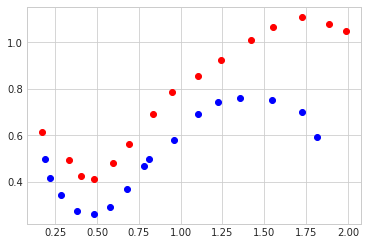

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
scale = 1/300
goal = scale * np.array([(51,184), (99,148), (121,127), (145,124), (179,144), (207,169), (251,207), (284,236), (331,257), (373,277), (426,303), (466,320), (517,333), (566,324), (597,315)])
template = scale * np.array([(56,149), (66,125), (85,103), (114,82), (144,78), (173,87), (203,111), (234,141), (243,149), (288,174), (331,207), (367,223), (406,228), (464,225), (517,210), (545,178)])

plt.plot(goal[:, 0], goal[:, 1], 'o', color='red');
plt.plot(template[:, 0], template[:, 1], 'o', color='blue');


A template mesh $\mathcal{S} = (\mathcal{V, E})$ with vertices $\mathcal{V}$ and edges $\mathcal{E}$ is to be deformed to match a target surface $\mathcal{T}$. The target surface needs to be defined in such a way that we can compute a distance from a point to it.

$\mathbf{X} = [\mathbf{X}_1 · · · \mathbf{X}_n]^T$

### The objective function

Minimize

$$
\overline{\boldsymbol{E}}(\boldsymbol{X}) = \overline{\boldsymbol{E}}_d(\boldsymbol{X}) + α\boldsymbol{E}_s(\boldsymbol{X}) + β\boldsymbol{E}_l(\boldsymbol{X})
$$

Distance term

$$
\boldsymbol{E}_d(\boldsymbol{X}) = \sum\limits_{\boldsymbol{v}_i \in \mathcal{V}} w_i \operatorname{dist}^2(\mathcal{T}, \boldsymbol{X}_i\boldsymbol{v}_i)
$$

Stiffness term

$$
\boldsymbol{E}_s(\boldsymbol{X}) = \sum\limits_{(i, j) \in \mathcal{E}} \Vert (\boldsymbol{X}_i - \boldsymbol{X}_j)\boldsymbol{G} \Vert _F^2
$$


Landmark term

$$
\boldsymbol{E}_l(\boldsymbol{X}) = \sum\limits_{(\boldsymbol{v}_i, \mathbf{l}) \in \mathcal{L}} \Vert (\boldsymbol{X}_i\mathbf{v}_i - \boldsymbol{l})\boldsymbol{G} \Vert ^2
$$


Distance term with fixed correspondences $(\boldsymbol{v}_i, \boldsymbol{u}_i)$
$$
\overline{\boldsymbol{E}}(\boldsymbol{X}) = \sum\limits_{\boldsymbol{v}_i \in \mathcal{V}} w_i \Vert \boldsymbol{X}_i\boldsymbol{v}_i - \mathbf{u}_i \Vert ^2
$$

The fixed correspondences can be re-written on the following form

$$
\overline{\boldsymbol{E}}(\boldsymbol{X}) = \Vert \boldsymbol{AX} - \boldsymbol{B} \Vert ^2_F
$$

$\boldsymbol{X}$ takes minimum value where the derivative is zero

$$
\boldsymbol{X} = (\boldsymbol{A}^T \boldsymbol{A})^{−1}\boldsymbol{A}^T \boldsymbol{B}
$$

### Algorithm
* Initialise $\boldsymbol{X}_0$
* For each stiffness $\alpha$
  * Until $\Vert \boldsymbol{X}^j − \boldsymbol{X}^{j−1} \Vert < \epsilon$
    * Find preliminary correspondences for $\mathcal{V}(X^{j−1})$
    * Determine $\boldsymbol{X}^j$ as the optimal deformation for the preliminary correspondences and $\alpha_i$

In [19]:
from scipy.sparse import csr_matrix


ModuleNotFoundError: No module named 'scipy'